# Guia da Camada de Rede
### A camada de rede serve para o cliente pedir uma requisição de rota entre dois pontos (Alice e Bob) e que seja atendida por uma rota escolhida e adequada.

#### IMPORTANDO AS DEPENDÊNCIAS
##### Este documento tem como objetivo demostrar a execução da camada de rede, além de suas funcionalidades. 

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger

#### Ao importar as dependências, vamos instaciar a rede com 20 qubits em cada host e 10 pares EPRS em cada canal da topologia. 

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


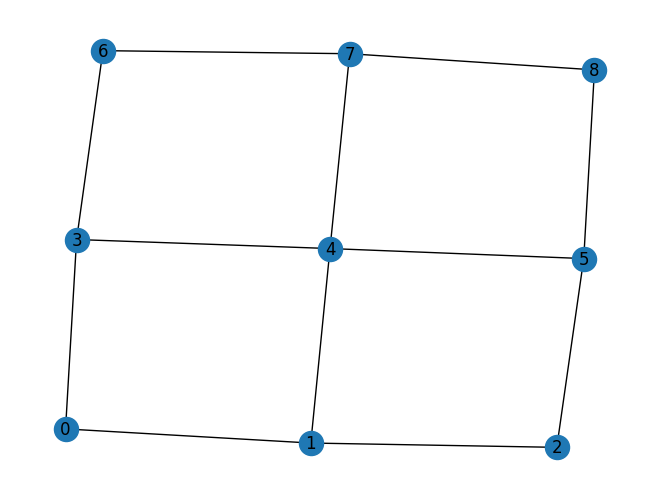

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()
Logger.activate(Logger)

##### Definindo o host 6 como Alice e o host 1 como Bob.

In [3]:
alice = rede.get_host(6)
bob = rede.get_host(1)

##### Nesse sentido, primeiramente precisa-se escolher a melhor rota e seus critérios são dados pela rota com menor caminho. Para verificar isso usaremos a função short_route_valid, que irá entregar uma rota válida entre Alice e Bob. Essa rota válida deve ter pelo menos 1 par EPR e se nó tem 2 qubits.

In [4]:
rede.networklayer.short_route_valid(8,0)

2024-11-17 15:39:00,167: Timeslot 1: Buscando rota válida entre 8 e 0.
2024-11-17 15:39:00,170: Rota válida encontrada: [8, 5, 2, 1, 0]


[8, 5, 2, 1, 0]

##### Dessa forma, vamos realizar o entanglement swapping entre Alice e Bob, o que permite criar um par de qubits emaranhados entre dois nós que não têm uma conexão direta de emaranhamento, utilizando pares intermediários.

In [5]:
rede.networklayer.entanglement_swapping(8,0)

2024-11-17 15:39:00,212: Timeslot 2: Buscando rota válida entre 8 e 0.
2024-11-17 15:39:00,217: Rota válida encontrada: [8, 5, 2, 1, 0]
2024-11-17 15:39:00,219: Timeslot 3: Realizando Entanglement Swapping.
2024-11-17 15:39:00,220: Entanglement Swapping falhou entre 8-5 e 5-2


False

##### Através dessa função, poderá ser avaliada a média das rotas válidas utilizadas na camada de rede.

In [6]:
rede.networklayer.get_avg_size_routes()

4.0

##### Nesta função, get_total_used_erps, será calculado a quantidade de pares EPRs usados na camada de Rede.

In [7]:
rede.get_total_useds_eprs()

2024-11-17 15:39:00,278: Eprs usados na camada PhysicalLayer: 0
2024-11-17 15:39:00,280: Eprs usados na camada LinkLayer: 0
2024-11-17 15:39:00,284: Eprs usados na camada NetworkLayer: 0


0

##### Chamando essa aresta, percebemos a criação do par EPR no nó 8 a 0, através do entanglement swapping.

In [8]:
rede.get_eprs_from_edge(8,0)

KeyError: 'The edge (8, 0) is not in the graph.'

##### A função get_timeslot apresenta quantos timeslot se passaram durante a execução da camada.

In [ ]:
rede.get_timeslot()

##### Por meio do display_all_qubits_timeslot, pode-se verificar em qual timeslot cada qubit foi criado.

In [ ]:
rede.display_all_qubit_timeslots()